In [1]:
import pandas as pd
import numpy as np
import utils.colonflag.feature_generation as fg
import matplotlib.pyplot as plt
from scipy.stats import linregresS

ImportError: cannot import name 'linregresS' from 'scipy.stats' (c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\scipy\stats\__init__.py)

# Feature Engineering Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, average_precision_score, f1_score, classification_report, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline


In [7]:
dir = r"C:\Users\victo\OneDrive - University of Leeds\Documents\Uni Work\Project\MIMIC Work\Liver Cancer Prediction\liver_pred\data\interim"
#processed_labs = pd.read_csv(dir + r"\processed_lab_data.csv", parse_dates=["charttime", "index_date"], index_col=0)
cohort_ids = pd.read_csv(dir + r"\matched_cohort_ids.csv", index_col=0)
processed_labs = pd.read_csv(dir + r"\processed_lab_data.csv", parse_dates=["charttime", "index_date"], index_col=0)

In [46]:
current_df = fg.current_bloods_df(processed_labs, cohort_ids)
historical_df = fg.historical_bloods(processed_labs, )

In [ ]:
from sklearn.linear_model import LogisticRegression
import utils.missing_data as md

In [448]:
current_df, historical_df, feature_df = fg.generate_features(processed_labs, cohort_ids, current_window_preindex=35, current_window_postindex=-21, historical_window=35)

Ref range missing: Urine Bacteria
Ref range missing: Urine Epithelial Cells
Ref range missing: Urine Length of Urine Collection
Ref range missing: Blood Estimated GFR (MDRD equation)
Ref range missing: Blood Green Top Hold (plasma)
Ref range missing: Urine Bilirubin
Ref range missing: Urine Blood
Ref range missing: Urine Leukocytes
Ref range missing: Urine Nitrite
Ref range missing: Urine Urine Appearance
Ref range missing: Urine Urine Color
Ref range missing: Urine Yeast
Removed 4048 subject_ids from current_labs and historical_labs
Removed 430 positive outcomes from current_labs


In [475]:
all_na_columns = feature_df.columns[feature_df.isna().sum()>len(feature_df)*0.8]
feature_df = feature_df.drop(columns=all_na_columns)
zero_mask = (feature_df == 0.0)
#all_zero_columns = feature_df.columns[zero_mask.sum()>len(feature_df)*0.8]
#all_zero_columns

In [477]:
feature_df.isna().sum().sort_values(ascending=False).head(10)

proximal_trend_Urine Yeast                         2835
distal_trend_Urine Yeast                           2835
proximal_trend_Urine Bacteria                      2835
distal_trend_Urine Bacteria                        2835
Urine Epithelial Cells                             2832
distal_trend_Blood Green Top Hold (plasma)         2775
proximal_trend_Blood Green Top Hold (plasma)       2775
proximal_trend_Urine Length of Urine Collection    2765
distal_trend_Urine Length of Urine Collection      2761
proximal_trend_Urine Epithelial Cells              2731
dtype: int64

In [478]:
nas_removed = feature_df.fillna(0, inplace=False)

In [479]:
feng_y = nas_removed['outcome']
feng_X = nas_removed.drop(columns=["outcome","subject_id"])

In [480]:
X_train, X_test,y_train, y_test = train_test_split(feng_X, feng_y, train_size = 0.8)
print(f"Train Length: {len(X_train)}        Train cases: {len(y_train[y_train==1])}    Proportion: {len(y_train[y_train==1])/len(y_train)*100} %")
print(f"Test Length: {len(X_test)}          Test cases: {len(y_test[y_test==1])}       Proportion: {len(y_test[y_test==1])/len(y_test)*100} %")

Train Length: 2941        Train cases: 742    Proportion: 25.22951377082625 %
Test Length: 736          Test cases: 178       Proportion: 24.184782608695652 %


In [481]:
#### Scale training #####
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled = X_train_scaled.set_axis(X_train.columns,axis=1)

#### Scale Test using training scaler ####
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_test_scaled.set_axis(X_test.columns,axis=1)


,Blood Alanine Aminotransferase (ALT),Blood Albumin,Blood Alkaline Phosphatase,Blood Anion Gap,Blood Asparate Aminotransferase (AST),Blood Basophils,Blood Bicarbonate,"Blood Bilirubin, Total","Blood Calcium, Total",Blood Chloride,...,proximal_trend_Urine Nitrite,proximal_trend_Urine Protein,proximal_trend_Urine RBC,proximal_trend_Urine Specific Gravity,proximal_trend_Urine Urine Appearance,proximal_trend_Urine Urine Color,proximal_trend_Urine Urobilinogen,proximal_trend_Urine WBC,proximal_trend_Urine Yeast,proximal_trend_Urine pH
0,-0.121988,0.583122,-0.462991,0.808413,0.385934,-0.684748,-1.097407,-0.367540,-0.905074,0.985031,...,0.0,0.009312,-0.033427,-0.024486,0.0,0.0,-0.018811,-0.019948,0.0,0.178143
1,-0.268333,0.185048,0.040554,-0.059956,-0.273908,-1.110691,-1.339729,-0.413192,0.962960,1.291903,...,0.0,0.009312,-0.033427,0.040559,0.0,0.0,-0.018811,-0.019948,0.0,0.018358
2,0.390222,-0.856229,3.759362,0.916959,0.371589,-0.471777,0.259599,2.006341,0.094107,-0.779484,...,0.0,0.009312,-0.033427,0.040559,0.0,0.0,-0.018811,-0.019948,0.0,0.018358
3,-0.135593,0.442309,-0.371333,0.265682,-0.328264,0.649888,-0.031188,-0.062512,0.354763,0.371287,...,0.0,0.009312,-0.033427,0.040559,0.0,0.0,-0.018811,-0.019948,0.0,0.018358
4,-0.134183,-0.707475,-0.351551,-0.222776,-0.230875,0.593081,0.550386,-0.321889,-1.078844,0.141133,...,0.0,0.009312,-0.033427,0.040559,0.0,0.0,-0.018811,-0.019948,0.0,0.018358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,-0.176794,0.072537,-0.334508,1.568236,-0.209507,1.231996,-0.321975,0.014433,1.920173,-0.779484,...,0.0,0.009312,-0.033427,0.040559,0.0,0.0,-0.018811,-0.019948,0.0,0.018358
732,-0.233634,0.074172,-0.589443,-0.385595,-0.326044,-0.684748,-0.225046,-0.118992,-1.600156,1.368621,...,0.0,0.009312,-0.033427,0.040559,0.0,0.0,-0.018811,-0.019948,0.0,0.018358
733,-0.471374,0.665224,-0.153019,0.265682,-0.189934,-0.414272,0.453457,-0.242467,0.528534,0.371287,...,0.0,0.009312,-0.033427,0.040559,0.0,0.0,-0.018811,-0.019948,0.0,0.018358
734,-0.219551,1.523833,0.246925,1.161188,-0.216530,1.979368,0.259599,-0.367540,0.126689,-2.045331,...,0.0,0.009312,-0.033427,0.040559,0.0,0.0,-0.018811,-0.019948,0.0,0.018358


In [462]:
X_train

,subject_id,Blood Alanine Aminotransferase (ALT),Blood Albumin,Blood Alkaline Phosphatase,Blood Anion Gap,Blood Asparate Aminotransferase (AST),Blood Basophils,Blood Bicarbonate,"Blood Bilirubin, Total","Blood Calcium, Total",...,proximal_trend_Urine Nitrite,proximal_trend_Urine Protein,proximal_trend_Urine RBC,proximal_trend_Urine Specific Gravity,proximal_trend_Urine Urine Appearance,proximal_trend_Urine Urine Color,proximal_trend_Urine Urobilinogen,proximal_trend_Urine WBC,proximal_trend_Urine Yeast,proximal_trend_Urine pH
1472,13309430,23.000000,3.993018,88.000000,13.500000,28.000000,0.100000,24.500000,0.500000,8.500000,...,0.0,0.0,0.974095,0.003187,0.0,0.0,0.0,0.000000,0.0,0.792917
2674,16449806,107.666667,3.450000,84.333333,13.000000,87.666667,0.800000,24.333333,0.566667,8.250000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
1855,14252818,16.000000,3.550000,81.500000,12.500000,15.000000,1.274264,30.000000,0.300000,8.850000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
3283,18336221,9.000000,2.900000,88.000000,13.000000,13.000000,1.000000,25.500000,0.400000,11.400000,...,0.0,0.0,0.000000,0.001123,0.0,0.0,0.0,0.000000,0.0,-0.835706
1968,14518036,15.739454,3.608894,95.529014,16.000000,9.211115,0.100000,21.000000,0.493584,9.600000,...,0.0,0.0,-154.142857,0.007429,0.0,0.0,0.0,0.000000,0.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,17725722,20.000000,3.600000,103.000000,12.500000,38.000000,0.400000,26.000000,2.100000,8.300000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
1655,13779191,25.628310,3.661093,73.590711,16.000000,37.944328,0.400000,22.500000,1.783638,8.400000,...,0.0,0.0,0.000000,-0.000160,0.0,0.0,0.0,-1.615105,0.0,0.468212
2435,15678150,25.000000,2.500000,118.000000,10.000000,42.000000,0.800000,29.500000,1.200000,8.150000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
1900,14350079,32.500000,4.050000,55.000000,18.666667,19.500000,0.400000,21.666667,0.450000,9.066667,...,0.0,0.0,4.686813,0.002656,0.0,0.0,0.0,9.373626,0.0,0.013898


In [482]:
param_grid_boost = {'max_depth': [2,5,15],
    'max_features': [20,26,30],
    'min_samples_leaf': [10,50],
    'min_samples_split': [4,50],
    'n_estimators': [200, 500]
}

In [483]:
boost = GradientBoostingClassifier()

gradboost = GridSearchCV(estimator = boost, param_grid = param_grid_boost,
                         cv = 5, verbose = 2, scoring='average_precision')
gradboost.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=2, max_features=20, min_samples_leaf=10, min_samples_split=4, n_estimators=200; total time=  12.7s
[CV] END max_depth=2, max_features=20, min_samples_leaf=10, min_samples_split=4, n_estimators=200; total time=  10.9s
[CV] END max_depth=2, max_features=20, min_samples_leaf=10, min_samples_split=4, n_estimators=200; total time=   5.8s
[CV] END max_depth=2, max_features=20, min_samples_leaf=10, min_samples_split=4, n_estimators=200; total time=   9.0s
[CV] END max_depth=2, max_features=20, min_samples_leaf=10, min_samples_split=4, n_estimators=200; total time=   6.9s
[CV] END max_depth=2, max_features=20, min_samples_leaf=10, min_samples_split=4, n_estimators=500; total time=  17.7s
[CV] END max_depth=2, max_features=20, min_samples_leaf=10, min_samples_split=4, n_estimators=500; total time=  23.6s
[CV] END max_depth=2, max_features=20, min_samples_leaf=10, min_samples_split=4, n_estimators=500; total time=  

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 5, 15], 'max_features': [20, 26, 30],
                         'min_samples_leaf': [10, 50],
                         'min_samples_split': [4, 50],
                         'n_estimators': [200, 500]},
             scoring='average_precision', verbose=2)

In [485]:
gradboost.best_params_

{'max_depth': 15,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 4,
 'n_estimators': 200}

Training Accuracy: 1.0
Training AUC: 1.0
Training Average Precision Score: 1.0
Training F1 Score: 1.0


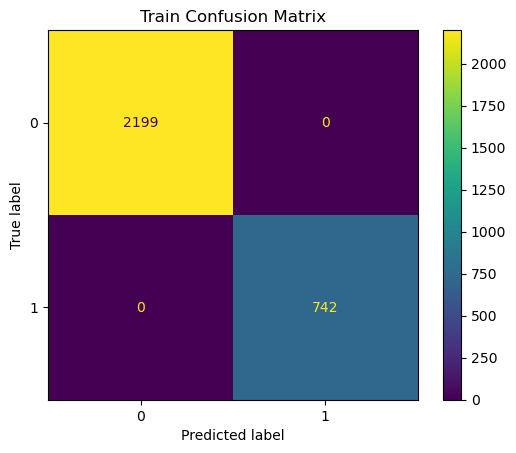

c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       558
         1.0       0.84      0.78      0.81       178

    accuracy                           0.91       736
   macro avg       0.89      0.87      0.88       736
weighted avg       0.91      0.91      0.91       736

Test Accuracy: 0.9116847826086957
Test AUC: 0.8671519471628206
Test Average Precision Score: 0.7108372747997809
Test F1 Score: 0.8104956268221575


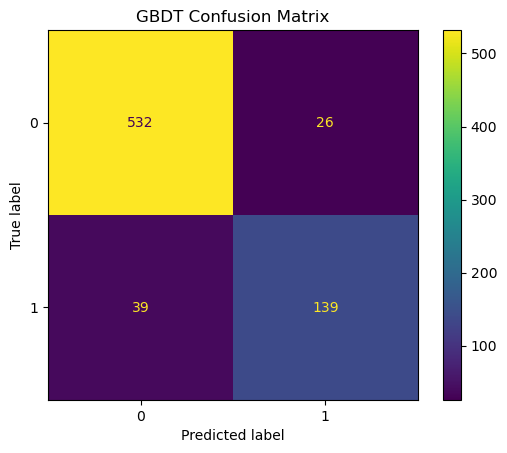

In [484]:
gb_preds = gradboost.predict(X_train_scaled)
accuracy = sum(gb_preds==y_train)/len(gb_preds)
auc = roc_auc_score(y_train, gb_preds)
aps = average_precision_score(y_train, gb_preds)
f1 = f1_score(y_train, gb_preds)
print('Training Accuracy:', accuracy)
print('Training AUC:', auc)
print('Training Average Precision Score:', aps)
print('Training F1 Score:', f1)


gb_conf = confusion_matrix(y_train, gb_preds)
gb_disp = ConfusionMatrixDisplay(gb_conf)
gb_disp.plot()
plt.title('Train Confusion Matrix')
plt.show()

gb_preds = gradboost.predict(X_test_scaled)
accuracy = sum(gb_preds==y_test)/len(gb_preds)
auc = roc_auc_score(y_test, gb_preds)
aps = average_precision_score(y_test, gb_preds)
f1 = f1_score(y_test, gb_preds)
#precision = 

print('Classification Report:')
print(classification_report(y_test, gb_preds))
print('Test Accuracy:', accuracy)
print('Test AUC:', auc)
print('Test Average Precision Score:', aps)
print('Test F1 Score:', f1)


gb_conf = confusion_matrix(y_test, gb_preds)
gb_disp = ConfusionMatrixDisplay(gb_conf)
gb_disp.plot()
plt.title('GBDT Confusion Matrix')
plt.show()

# CNN Models

In [138]:

from sklearn.model_selection import KFold


In [139]:
import torch
torch.set_default_dtype(torch.float32)
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import pandas as pd
from torchvision import transforms
from sklearn.metrics import precision_score, average_precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix

## Data Preparation

In [51]:
X, y  = fg.create_array_for_CNN(processed_labs, -4, 100)

In [52]:
len(X)

3609

In [126]:
np.save(dir+'CNN_input.npy', X)
np.save(dir+'CNN_output.npy', y)
print("files saved successfully.")

files saved successfully.


In [127]:
class NpyDataset(Dataset):
    def __init__(self, file_path,labels_file_path):
        self.data = np.load(file_path)
        self.labels = np.load(labels_file_path)
        self.dtype = torch.float32
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        # Assuming you have labels for each sample
        label = self.labels[idx]# You should adjust this to fetch labels if available
        label = torch.tensor([label], dtype=self.dtype)
        sample = torch.tensor(sample, dtype=self.dtype)
        sample = torch.unsqueeze(sample, dim=0) 

        return sample, label



In [128]:
# File path to the .npy file
file_path = dir+'CNN_input.npy'
labels_file_path = dir+'CNN_output.npy'
# Create a dataset
dataset = NpyDataset(file_path, labels_file_path)

# Create a DataLoader to load the dataset
batch_size = 32
shuffle = True  # You can set it to True if you want to shuffle the data
num_workers = 0  # Number of subprocesses to use for data loading (0 means the data will be loaded in the main process)
#dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

# Split the dataset indices into training and testing sets
train_size = int(0.7 * len(dataset))  # 80% for training, adjust ratio as needed
test_size = int(0.2 * len(dataset))  # 20% for testing, adjust ratio as needed
val_size = len(dataset)-(train_size+test_size)   # 10% of the training data for validation
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size,val_size, test_size])

# Create separate DataLoaders for training and testing
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
# Compute the mean and standard deviation of the dataset
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

for data, _ in train_dataloader:
    total_samples += data.size(0)
    mean_sum += data.mean(dim=(0, 1, 3))  # Calculate mean along batch (0), width (2), and height (3) axes
    std_sum += torch.std(data, dim=(0, 1, 3))  # Calculate std along batch (0), width (2), and height (3) axes
mean = mean_sum / total_samples    
std = std_sum / total_samples

custom_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert data to PyTorch tensor
    #nan,  # Handle NaN values
    transforms.Normalize(mean=[mean], std=[std]),  # Normalize data using computed mean and std
    
])
train_dataloader.transform = custom_transform
test_dataloader.transform = custom_transform
val_dataloader.transform = custom_transform





In [130]:
w1 = len(dataset)/(2*sum(dataset.labels == 0))
w2 = torch.tensor(len(dataset)/(2*sum(dataset.labels == 1)))
weights = torch.tensor([w1,w2], dtype=torch.float32)


In [131]:
weights[1]

tensor(2.0413)

In [144]:
# Initialize your CNN
cnn = SimpleCNN()

# Define your loss function and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([w2]), reduction='mean')
optimizer = optim.Adam(cnn.parameters(), lr=1e-6, weight_decay=1e-5)
num_epochs = 50
# Initialize the best validation loss to positive infinity
best_val_loss = float('inf')
training_losses = []
validation_losses = []
# Assuming your input data is in the form of a PyTorch tensor
# Here's how you can train your CNN
for epoch in range(num_epochs):
    # Create a progress bar
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
    running_loss = 0.0
    
    cnn.train()

    # Iterate over the dataset
    for inputs, labels in progress_bar:
        optimizer.zero_grad()
        outputs = cnn(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item()
        
        # Update the progress bar with the current loss
        progress_bar.set_postfix({'loss': running_loss / len(progress_bar)})
    
    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataloader)
    training_losses.append(epoch_loss)
    # Validation phase
    cnn.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = cnn(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    
    # Calculate average validation loss for the epoch
    epoch_val_loss = running_val_loss / len(val_dataloader)
    validation_losses.append(epoch_val_loss)
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(cnn.state_dict(), dir+'/model.pth')
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {epoch_loss:.4f}', 'Validation Loss:', epoch_val_loss)


Epoch 1/50:   0%|          | 0/91 [00:00<?, ?it/s]

Epoch [1/50], Training Loss: 1.0544 Validation Loss: 0.85796900935795


Epoch [2/50], Training Loss: 1.0068 Validation Loss: 0.8417183368102364


Epoch [3/50], Training Loss: 1.0203 Validation Loss: 0.8352327942848206


Epoch [4/50], Training Loss: 0.9816 Validation Loss: 0.8283276221026545


Epoch [5/50], Training Loss: 0.9710 Validation Loss: 0.8231184715810029


Epoch [6/50], Training Loss: 0.9651 Validation Loss: 0.8138685796571814


Epoch [7/50], Training Loss: 0.9476 Validation Loss: 0.8120685116104458


Epoch [8/50], Training Loss: 0.9296 Validation Loss: 0.8064389617546744


Epoch [9/50], Training Loss: 0.9328 Validation Loss: 0.8029187243917714


Epoch [10/50], Training Loss: 0.9238 Validation Loss: 0.8040923968605374


Epoch [11/50], Training Loss: 0.9040 Validation Loss: 0.7972679941550546


Epoch [12/50], Training Loss: 0.8967 Validation Loss: 0.7964900110078894


Epoch [13/50], Training Loss: 0.9021 Validation Loss: 0.788814902305603


Epoch [14/50], Training Loss: 0.8981 Validation Loss: 0.7872525453567505


Epoch [15/50], Training Loss: 0.8826 Validation Loss: 0.7877670474674391


Epoch [16/50], Training Loss: 0.8788 Validation Loss: 0.7878275409988735


Epoch [17/50], Training Loss: 0.8834 Validation Loss: 0.7823746644932291


Epoch [18/50], Training Loss: 0.8779 Validation Loss: 0.7799571078756581


Epoch [19/50], Training Loss: 0.8858 Validation Loss: 0.7836482706277267


Epoch [20/50], Training Loss: 0.8658 Validation Loss: 0.7784184994904891


Epoch [21/50], Training Loss: 0.8769 Validation Loss: 0.7826191808866418


Epoch [22/50], Training Loss: 0.8742 Validation Loss: 0.7792914743008821


Epoch [23/50], Training Loss: 0.8421 Validation Loss: 0.7709191078725068


Epoch [24/50], Training Loss: 0.8380 Validation Loss: 0.7729336723037388


Epoch [25/50], Training Loss: 0.8363 Validation Loss: 0.7719662137653517


Epoch [26/50], Training Loss: 0.8417 Validation Loss: 0.7700413880140885


Epoch [27/50], Training Loss: 0.8271 Validation Loss: 0.7705528684284376


Epoch [28/50], Training Loss: 0.8405 Validation Loss: 0.7695013362428417


Epoch [29/50], Training Loss: 0.8331 Validation Loss: 0.7630907556285029


Epoch [30/50], Training Loss: 0.8301 Validation Loss: 0.7707470603611158


Epoch [31/50], Training Loss: 0.8410 Validation Loss: 0.7687159673027371


Epoch [32/50], Training Loss: 0.8323 Validation Loss: 0.7652639150619507


Epoch [33/50], Training Loss: 0.8249 Validation Loss: 0.7603854640670444


Epoch [34/50], Training Loss: 0.8202 Validation Loss: 0.7593073974484983


Epoch [35/50], Training Loss: 0.8117 Validation Loss: 0.7606055114580237


Epoch [36/50], Training Loss: 0.8206 Validation Loss: 0.7610771370970685


Epoch [37/50], Training Loss: 0.8036 Validation Loss: 0.7611512360365494


Epoch [38/50], Training Loss: 0.7997 Validation Loss: 0.7628098467121953


Epoch [39/50], Training Loss: 0.8005 Validation Loss: 0.7578225394953853


Epoch [40/50], Training Loss: 0.8036 Validation Loss: 0.7564907644105994


Epoch [41/50], Training Loss: 0.7978 Validation Loss: 0.7574123662451039


Epoch [42/50], Training Loss: 0.8069 Validation Loss: 0.7551287205322929


Epoch [43/50], Training Loss: 0.7997 Validation Loss: 0.7583090559295986


Epoch [44/50], Training Loss: 0.7937 Validation Loss: 0.759207686652308


Epoch [45/50], Training Loss: 0.7897 Validation Loss: 0.7553347789722941


Epoch [46/50], Training Loss: 0.8054 Validation Loss: 0.7515723860782125


Epoch [47/50], Training Loss: 0.7903 Validation Loss: 0.7574069474054419


Epoch [48/50], Training Loss: 0.7861 Validation Loss: 0.7508731484413147


Epoch [49/50], Training Loss: 0.7852 Validation Loss: 0.7550064092097075


Epoch [50/50], Training Loss: 0.7805 Validation Loss: 0.7461446290430815


In [145]:
# Function to compute evaluation metrics
def evaluate_performance(dataloader):
    cnn.load_state_dict(torch.load(dir+'/model.pth'))  # Load the best model
    cnn.eval()  # Set the model to evaluation mode
    total_correct = 0
    total_samples = 0
    predicted_labels = []
    true_labels = []

    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in dataloader:
            outputs = cnn(inputs)
            probabilities = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities
            predicted = (probabilities > 0.5).int()
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            predicted_labels.extend(predicted.numpy())
            true_labels.extend(labels.numpy())

    # Compute accuracy
    accuracy = total_correct / total_samples

    # Compute precision and recall
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    return accuracy, precision, recall, conf_matrix

# Evaluate performance on training dataset
train_accuracy, train_precision, train_recall, train_conf_matrix = evaluate_performance(train_dataloader)

# Evaluate performance on test dataset
test_accuracy, test_precision, test_recall, test_conf_matrix = evaluate_performance(test_dataloader)

print('Training Performance:')
print(f'Accuracy: {train_accuracy:.2%}')
print(f'Precision: {train_precision:.2f}')
print(f'Recall: {train_recall:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)

print('\nTest Performance:')
print(f'Accuracy: {test_accuracy:.2%}')
print(f'Precision: {test_precision:.2f}')
print(f'Recall: {test_recall:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)


Training Performance:
Accuracy: 76.20%
Precision: 0.53
Recall: 0.67
Confusion Matrix:
[[1704  441]
 [ 246  496]]

Test Performance:
Accuracy: 74.90%
Precision: 0.50
Recall: 0.64
Confusion Matrix:
[[424 116]
 [ 65 116]]


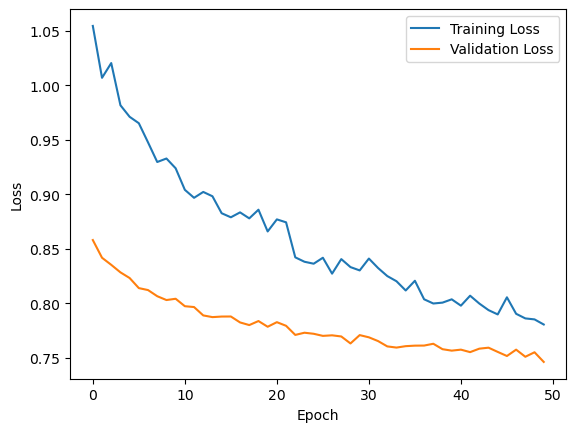

In [146]:
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [194]:
X[0].shape

(54, 100)

## 1D kernel

In [217]:
class onedCNN(nn.Module):
    def __init__(self):
        super(onedCNN, self).__init__()
        # Define your convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(1,3), padding=1)
        # (input_size - kernel_size + 2*padding)/stride + 1
        # (100 - 3 + 2*1)/1 + 1 = 100
        # (54 - 1 +2*1)/1 + 1 = 56
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,3), padding=1)
        # 50 - 3 + 2*1)/1 + 1 = 50
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(1,3), padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1,2), padding=1)
        # Define your fully connected layers

        self.fc1 = nn.Linear(128* 6 * 6, 64)
        self.fc2 = nn.Linear(64, 1)  # Assuming you have 2 classes

        self.dropout = nn.Dropout(0.6)
    def forward(self, x):
        # Input x has shape (batch_size, channels, height, width)
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, kernel_size=(1,2), stride=2)

        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, kernel_size=(1,2), stride=2)
      
        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, kernel_size=(1,2), stride=2)
       
        x = self.conv4(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, kernel_size=(1,2), stride=2)
        # Flatten the output for the fully connected layers
        x = x.view(x.size(0), -1) # x.size(0) is the batch size
        
        x = self.dropout(x)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [218]:
# Initialize your CNN
cnn = onedCNN()

best_val_loss = float('inf')

# Define your loss function and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=w2,  reduction='mean')
optimizer = optim.Adam(cnn.parameters(), lr=0.00001, weight_decay=1e-5)
num_epochs = 100

training_losses = []
val_losses = []
# Assuming your input data is in the form of a PyTorch tensor
# Here's how you can train your CNN
for epoch in range(num_epochs):
    # Create a progress bar
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
    running_loss = 0.0
    
    # Iterate over the dataset
    for inputs, labels in progress_bar:
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item()
        
        # Update the progress bar with the current loss
        progress_bar.set_postfix({'loss': running_loss / len(progress_bar)})
    
    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataloader)
    training_losses.append(epoch_loss)
    # Validation phase
    cnn.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = cnn(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    
    # Calculate average validation loss for the epoch
    epoch_val_loss = running_val_loss / len(val_dataloader)
    val_losses.append(epoch_val_loss)
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(cnn.state_dict(), dir+'/1d_model.pth')
    
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {epoch_loss:.4f}', 'Validation Loss:', epoch_val_loss)


Epoch 1/100:   0%|          | 0/91 [00:00<?, ?it/s]

RuntimeError: max_pool1d: Expected 2D or 3D (batch mode) tensor with optional 0 dim batch size for input, but got:[32, 32, 56, 100]

In [176]:
from sklearn.metrics import roc_curve, roc_auc_score

Training Performance:
Accuracy: 78.35%
AUROC: 0.63
Precision: 0.82
Recall: 0.20
Confusion Matrix:
[[2111   34]
 [ 591  151]]

Test Performance:
Accuracy: 78.36%
AUROC: 0.63
Precision: 0.78
Recall: 0.19
Confusion Matrix:
[[530  10]
 [146  35]]


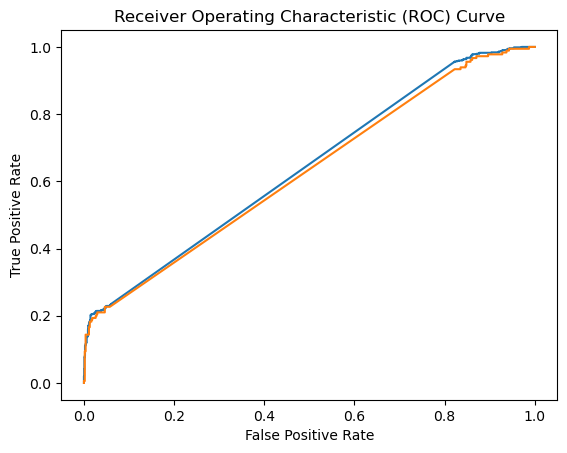

In [215]:

# Function to compute evaluation metrics
def evaluate_performance(dataloader):
    cnn.load_state_dict(torch.load(dir+'/1d_model.pth'))  # Load the best model
    cnn.eval()  # Set the model to evaluation mode
    total_correct = 0
    total_samples = 0
    predicted_labels = []
    true_labels = []
    all_probabilities = []
    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in dataloader:
            outputs = cnn(inputs)
            probabilities = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities
            predicted = (probabilities > 0.5).int()
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            predicted_labels.extend(predicted.numpy())
            true_labels.extend(labels.numpy())
            all_probabilities.extend(probabilities.numpy())

    # Compute accuracy
    accuracy = total_correct / total_samples

    # Compute precision and recall
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # calculate false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(true_labels, all_probabilities)
    # Calculate AUROC
    auroc = roc_auc_score(true_labels, all_probabilities)

   
    # plot ROC curve
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    #plt.show()

    return accuracy, precision, recall, conf_matrix, auroc

# Evaluate performance on training dataset
train_accuracy, train_precision, train_recall, train_conf_matrix, auroc = evaluate_performance(train_dataloader)

# Evaluate performance on test dataset
test_accuracy, test_precision, test_recall, test_conf_matrix, auroc = evaluate_performance(test_dataloader)

print('Training Performance:')
print(f'Accuracy: {train_accuracy:.2%}')
print(f'AUROC: {auroc:.2f}')
print(f'Precision: {train_precision:.2f}')
print(f'Recall: {train_recall:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)

print('\nTest Performance:')
print(f'Accuracy: {test_accuracy:.2%}')
print(f'AUROC: {auroc:.2f}')
print(f'Precision: {test_precision:.2f}')
print(f'Recall: {test_recall:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)


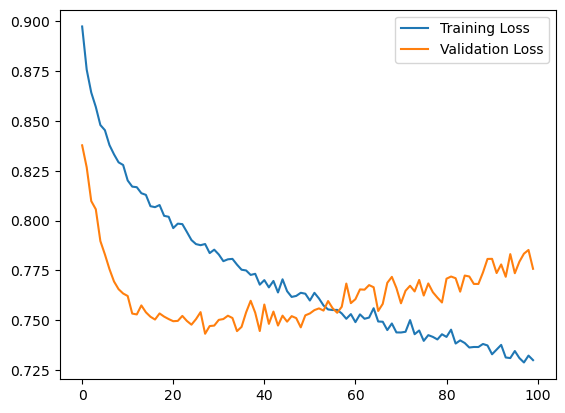

In [216]:
plt.plot(training_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()

# 1d conv layers

In [225]:
# reshape so that each patient has 54 channels of 1d time series data
num_patients = X.shape[0]
num_tests = X.shape[1]
num_timesteps = X.shape[2]
reshaped_array = X.reshape(num_patients, num_tests, num_timesteps)

reshaped_array = np.transpose(reshaped_array, (0, 2, 1))

np.save(dir+'CNN_1d_input.npy', X)
np.save(dir+'CNN_1d_output.npy', y)
print("files saved successfully.")

files saved successfully.


In [ ]:
# same as before except without the unsqueeze to show 1 channel
class OneD_Dataset(Dataset):
    def __init__(self, file_path,labels_file_path):
        self.data = np.load(file_path)
        self.labels = np.load(labels_file_path)
        self.dtype = torch.float32
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        # Assuming you have labels for each sample
        label = self.labels[idx]# You should adjust this to fetch labels if available
        label = torch.tensor([label], dtype=self.dtype)
        sample = torch.tensor(sample, dtype=self.dtype)
        

        return sample, label


In [292]:
# File path to the .npy file
file_path_1d = dir+'CNN_1d_input.npy'
labels_file_path_1d = dir+'CNN_1d_output.npy'
# Create a dataset
dataset_1d = OneD_Dataset(file_path_1d, labels_file_path_1d)

# Create a DataLoader to load the dataset
batch_size = 100
shuffle = True  # You can set it to True if you want to shuffle the data
num_workers = 0  # Number of subprocesses to use for data loading (0 means the data will be loaded in the main process)
#dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

# Split the dataset indices into training and testing sets
train_size = int(0.7 * len(dataset))  # 80% for training, adjust ratio as needed
test_size = int(0.2 * len(dataset))  # 20% for testing, adjust ratio as needed
val_size = len(dataset)-(train_size+test_size)   # 10% of the training data for validation
train_dataset_1d, val_dataset_1d, test_dataset_1d = torch.utils.data.random_split(dataset_1d, [train_size,val_size, test_size])

# Create separate DataLoaders for training and testing
train_dataloader_1d = DataLoader(train_dataset_1d, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
test_dataloader_1d = DataLoader(test_dataset_1d, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
val_dataloader_1d = DataLoader(val_dataset_1d, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
# Compute the mean and standard deviation of the dataset
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

for data, _ in train_dataloader:
    total_samples += data.size(0)
    mean_sum += data.mean(dim=(0, 1))  # Calculate mean along batch (0), width (2), and height (3) axes
    std_sum += torch.std(data, dim=(0, 1))  # Calculate std along batch (0), width (2), and height (3) axes
mean = mean_sum / total_samples    
std = std_sum / total_samples

custom_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert data to PyTorch tensor
    #nan,  # Handle NaN values
    transforms.Normalize(mean=[mean], std=[std]),  # Normalize data using computed mean and std
    
])
train_dataloader_1d.transform = custom_transform
test_dataloader_1d.transform = custom_transform
val_dataloader_1d.transform = custom_transform

In [293]:
data.shape

torch.Size([7, 1, 54, 100])

In [294]:
class onedCNN2(nn.Module):
    def __init__(self):
        super(onedCNN2, self).__init__()
        # Define your convolutional layers
        self.conv1 = nn.Conv1d(in_channels=54, out_channels=108, kernel_size=3)
        # (input_size - kernel_size + 2*padding)/stride + 1
        # (100 - 3 + 2*1)/1 + 1 = 100
        # (54 - 1 +2*1)/1 + 1 = 56
        self.conv2 = nn.Conv1d(in_channels=108, out_channels=216, kernel_size=3, padding=1)
        # 50 - 3 + 2*1)/1 + 1 = 50
        self.conv3 = nn.Conv1d(in_channels=216, out_channels=216, kernel_size=3, padding=1)
        self.conv4 = nn.Conv1d(in_channels=216, out_channels=432, kernel_size=2, padding=1)
        # Define your fully connected layers

        self.fc1 = nn.Linear(432* 7, 64)
        self.fc2 = nn.Linear(64, 1)  # Assuming you have 2 classes

        self.dropout = nn.Dropout(0.6)
    def forward(self, x):
        # Input x has shape (batch_size, channels, height, width)
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool1d(x, kernel_size=2, stride=2)
        
        
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool1d(x, kernel_size=2, stride=2)
        
        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool1d(x, kernel_size=2, stride=2)
        
        
        x = self.conv4(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool1d(x, kernel_size=1, stride=2)
        
        # Flatten the output for the fully connected layers
        x = x.view(x.size(0), -1) # x.size(0) is the batch size

        x = self.dropout(x)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [298]:
# Initialize your CNN
cnn = onedCNN2()

best_val_loss = float('inf')

# Define your loss function and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=w2,  reduction='mean')
unweighted_criterion = nn.BCEWithLogitsLoss(reduction='mean')
optimizer = optim.Adam(cnn.parameters(), lr=0.00001, weight_decay=1e-5)
num_epochs = 100

training_losses = []
val_losses = []
# Assuming your input data is in the form of a PyTorch tensor
# Here's how you can train your CNN
for epoch in range(num_epochs):
    # Create a progress bar
    progress_bar = tqdm(train_dataloader_1d, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
    running_loss = 0.0
    
    # Iterate over the dataset
    for inputs, labels in progress_bar:
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item()
        
        # Update the progress bar with the current loss
        progress_bar.set_postfix({'loss': running_loss / len(progress_bar)})
    
    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataloader_1d)
    training_losses.append(epoch_loss)
    # Validation phase
    cnn.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_dataloader_1d:
            outputs = cnn(inputs)
            loss = unweighted_criterion(outputs, labels)
            running_val_loss += loss.item()
    
    # Calculate average validation loss for the epoch
    epoch_val_loss = running_val_loss / len(val_dataloader_1d)
    val_losses.append(epoch_val_loss)
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(cnn.state_dict(), dir+'/1d_model.pth')
    
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {epoch_loss:.4f}', 'Validation Loss:', epoch_val_loss)


Epoch [1/100], Training Loss: 0.8854 Validation Loss: 0.6737783998250961


Epoch [2/100], Training Loss: 0.8602 Validation Loss: 0.6763093024492264


Epoch [3/100], Training Loss: 0.8564 Validation Loss: 0.6715224385261536


Epoch [4/100], Training Loss: 0.8450 Validation Loss: 0.6653691977262497


Epoch [5/100], Training Loss: 0.8427 Validation Loss: 0.6605329811573029


Epoch [6/100], Training Loss: 0.8362 Validation Loss: 0.6584489941596985


Epoch [7/100], Training Loss: 0.8290 Validation Loss: 0.6527310162782669


Epoch [8/100], Training Loss: 0.8190 Validation Loss: 0.6431616991758347


Epoch [9/100], Training Loss: 0.8094 Validation Loss: 0.6409609019756317


Epoch [10/100], Training Loss: 0.8054 Validation Loss: 0.6373654752969742


Epoch [11/100], Training Loss: 0.7927 Validation Loss: 0.6296593993902206


Epoch [12/100], Training Loss: 0.7841 Validation Loss: 0.6244368851184845


Epoch [13/100], Training Loss: 0.7719 Validation Loss: 0.6064424514770508


Epoch [14/100], Training Loss: 0.7626 Validation Loss: 0.6047583669424057


Epoch [15/100], Training Loss: 0.7428 Validation Loss: 0.5907658785581589


Epoch [16/100], Training Loss: 0.7322 Validation Loss: 0.5916416943073273


Epoch [17/100], Training Loss: 0.7183 Validation Loss: 0.5816947221755981


Epoch [18/100], Training Loss: 0.7082 Validation Loss: 0.5785017311573029


Epoch [19/100], Training Loss: 0.6918 Validation Loss: 0.5609150826931


Epoch [20/100], Training Loss: 0.6821 Validation Loss: 0.5610776990652084


Epoch [21/100], Training Loss: 0.6705 Validation Loss: 0.5566120892763138


Epoch [22/100], Training Loss: 0.6590 Validation Loss: 0.5660400092601776


Epoch [23/100], Training Loss: 0.6459 Validation Loss: 0.5339022725820541


Epoch [24/100], Training Loss: 0.6349 Validation Loss: 0.5384894534945488


Epoch [25/100], Training Loss: 0.6210 Validation Loss: 0.5525490865111351


Epoch [26/100], Training Loss: 0.6208 Validation Loss: 0.529082328081131


Epoch [27/100], Training Loss: 0.6043 Validation Loss: 0.5419469401240349


Epoch [28/100], Training Loss: 0.5914 Validation Loss: 0.5317339524626732


Epoch [29/100], Training Loss: 0.5811 Validation Loss: 0.5336488783359528


Epoch [30/100], Training Loss: 0.5700 Validation Loss: 0.537475660443306


Epoch [31/100], Training Loss: 0.5588 Validation Loss: 0.5235031694173813


Epoch [32/100], Training Loss: 0.5605 Validation Loss: 0.5162737667560577


Epoch [33/100], Training Loss: 0.5497 Validation Loss: 0.5330949574708939


Epoch [34/100], Training Loss: 0.5442 Validation Loss: 0.5354071259498596


Epoch [35/100], Training Loss: 0.5282 Validation Loss: 0.5118772760033607


Epoch [36/100], Training Loss: 0.5284 Validation Loss: 0.5147056952118874


Epoch [37/100], Training Loss: 0.5188 Validation Loss: 0.5057070031762123


Epoch [38/100], Training Loss: 0.5129 Validation Loss: 0.519091784954071


Epoch [39/100], Training Loss: 0.5049 Validation Loss: 0.5081390663981438


Epoch [40/100], Training Loss: 0.4912 Validation Loss: 0.5147946700453758


Epoch [41/100], Training Loss: 0.4886 Validation Loss: 0.5172303840517998


Epoch [42/100], Training Loss: 0.4793 Validation Loss: 0.5072036534547806


Epoch [43/100], Training Loss: 0.4704 Validation Loss: 0.5080327019095421


Epoch [44/100], Training Loss: 0.4710 Validation Loss: 0.5040014088153839


Epoch [45/100], Training Loss: 0.4624 Validation Loss: 0.5060144364833832


Epoch [46/100], Training Loss: 0.4540 Validation Loss: 0.5080883726477623


Epoch [47/100], Training Loss: 0.4503 Validation Loss: 0.5176023617386818


Epoch [48/100], Training Loss: 0.4457 Validation Loss: 0.5194316059350967


Epoch [49/100], Training Loss: 0.4388 Validation Loss: 0.49408167600631714


Epoch [50/100], Training Loss: 0.4337 Validation Loss: 0.5025166496634483


Epoch [51/100], Training Loss: 0.4288 Validation Loss: 0.4907311946153641


Epoch [52/100], Training Loss: 0.4224 Validation Loss: 0.5000697746872902


Epoch [53/100], Training Loss: 0.4164 Validation Loss: 0.49599793553352356


Epoch [54/100], Training Loss: 0.4120 Validation Loss: 0.5361486449837685


Epoch [55/100], Training Loss: 0.4096 Validation Loss: 0.5158730149269104


Epoch [56/100], Training Loss: 0.3998 Validation Loss: 0.5481933876872063


Epoch [57/100], Training Loss: 0.3958 Validation Loss: 0.53276576846838


Epoch [58/100], Training Loss: 0.3903 Validation Loss: 0.522966243326664


Epoch [59/100], Training Loss: 0.3845 Validation Loss: 0.5097979307174683


Epoch [60/100], Training Loss: 0.3796 Validation Loss: 0.5264702439308167


Epoch [61/100], Training Loss: 0.3760 Validation Loss: 0.49022364616394043


Epoch [62/100], Training Loss: 0.3712 Validation Loss: 0.5222207009792328


Epoch [63/100], Training Loss: 0.3624 Validation Loss: 0.5560307875275612


Epoch [64/100], Training Loss: 0.3682 Validation Loss: 0.5182276144623756


Epoch [65/100], Training Loss: 0.3561 Validation Loss: 0.5030425116419792


Epoch [66/100], Training Loss: 0.3521 Validation Loss: 0.5576527565717697


Epoch [67/100], Training Loss: 0.3482 Validation Loss: 0.5149842128157616


Epoch [68/100], Training Loss: 0.3415 Validation Loss: 0.5308867841959


Epoch [69/100], Training Loss: 0.3334 Validation Loss: 0.522828608751297


Epoch [70/100], Training Loss: 0.3306 Validation Loss: 0.5069751143455505


Epoch [71/100], Training Loss: 0.3264 Validation Loss: 0.5152198374271393


Epoch [72/100], Training Loss: 0.3317 Validation Loss: 0.5496620759367943


KeyboardInterrupt: 

## Evaluation

Training Performance:
Accuracy: 92.20%
AUROC: 0.83
Precision: 0.91
Recall: 0.75
Confusion Matrix:
[[1868   44]
 [ 153  461]]

Test Performance:
Accuracy: 84.88%
AUROC: 0.83
Precision: 0.81
Recall: 0.52
Confusion Matrix:
[[518  22]
 [ 87  94]]


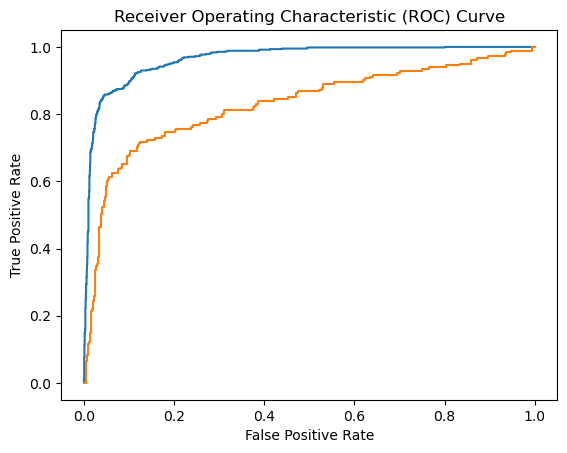

In [299]:
# Evaluate performance on training dataset
train_accuracy, train_precision, train_recall, train_conf_matrix, auroc = evaluate_performance(train_dataloader_1d)

# Evaluate performance on test dataset
test_accuracy, test_precision, test_recall, test_conf_matrix, auroc = evaluate_performance(test_dataloader_1d)

print('Training Performance:')
print(f'Accuracy: {train_accuracy:.2%}')
print(f'AUROC: {auroc:.2f}')
print(f'Precision: {train_precision:.2f}')
print(f'Recall: {train_recall:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)

print('\nTest Performance:')
print(f'Accuracy: {test_accuracy:.2%}')
print(f'AUROC: {auroc:.2f}')
print(f'Precision: {test_precision:.2f}')
print(f'Recall: {test_recall:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)

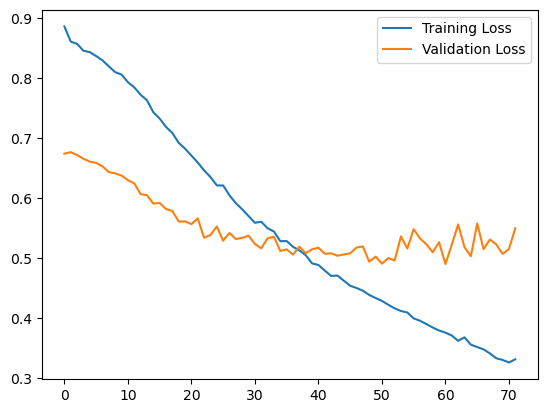

In [300]:
plt.plot(training_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()

# RNN

In [331]:
times_available = []
for i in range(0,X.shape[0]):
    times_available.append(sum(sum(X[i,:,:] != 0)!=0))

In [359]:
times_available = np.array(times_available)
# Convert labels tensor to a numpy array
labels_array = y.to_numpy()

# Find the indices of 1s in the labels array
indices = np.where(labels_array == True)[0]

# Get the corresponding entries in times_available
times_available_case = times_available[indices]
times_available_control = times_available[np.where(labels_array == False)[0]]

In [365]:
import seaborn as sns

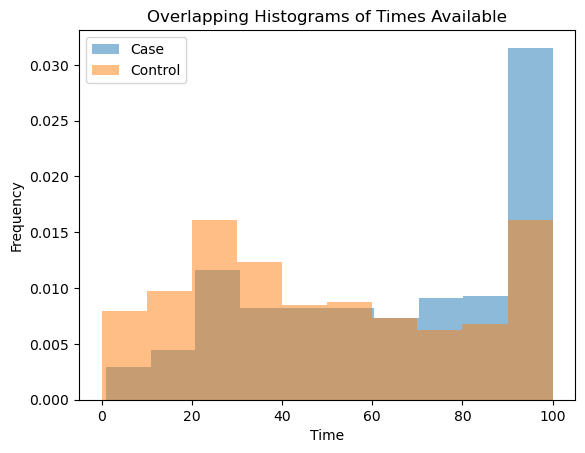

In [367]:
# Plot overlapping histograms
plt.hist(times_available_case, bins=10, alpha=0.5, label='Case', density=True)
plt.hist(times_available_control, bins=10, alpha=0.5, label='Control', density=True)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of Times Available')
plt.legend()

# Show the plot
plt.show()


In [368]:
from scipy.stats import chisquare

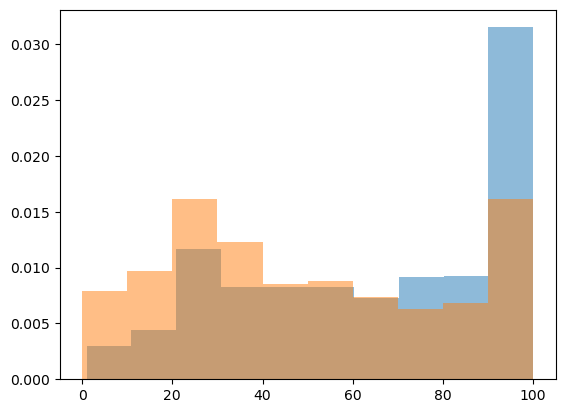

In [386]:
case_counts= plt.hist(times_available_case, bins=10, density=True, alpha=0.5)
control_counts = plt.hist(times_available_control, bins=10, density=True, alpha=0.5)

In [382]:
case_counts, case_bins = np.histogram(times_available_case, bins=10, density=True)
control_counts, control_bins = np.histogram(times_available_control, bins=10, density=True)

total_observed = sum(case_counts)
total_expected = sum(control_counts)

case_counts_normalized = [count / total_observed for count in case_counts]
control_counts_normalized = [count / total_expected for count in control_counts]

In [384]:
chi2, pvalue = chisquare(case_counts_normalized, f_exp = control_counts_normalized)

Distributions of the lengths are not significantly different

In [387]:
chi2
pvalue

0.9999985272824579

In [337]:
#fg.historical_labs(processed_labs)
binned_df = fg.bin_measurements(processed_labs)

In [348]:
len(binned_df.loc[10000980].index.levels[1])

5334

## LSTM

RNN expects input to be of shape [seq_length, batch_size, features] but you can use batch_first=True

In [389]:
X.shape

(3609, 54, 100)

In [390]:
rnn_input = X.reshape((100, 3609, 54))

In [394]:
rnn_input.shape

(100, 3609, 54)

In [395]:
np.save(dir+'rnn_input.npy', rnn_input)
np.save(dir+'rnn_output.npy', y)
print("files saved successfully.")

files saved successfully.


In [396]:
class RNNDataset(Dataset):
    def __init__(self, file_path,labels_file_path):
        self.data = np.load(file_path)
        self.labels = np.load(labels_file_path)
        self.dtype = torch.float32
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        # Assuming you have labels for each sample
        label = self.labels[idx]# You should adjust this to fetch labels if available
        label = torch.tensor([label], dtype=self.dtype)
        sample = torch.tensor(sample, dtype=self.dtype)
        #sample = torch.unsqueeze(sample, dim=0) 

        return sample, label


In [403]:
# File path to the .npy file
file_path = dir+'CNN_input.npy'
labels_file_path = dir+'CNN_output.npy'
# Create a dataset
dataset_rnn = RNNDataset(file_path, labels_file_path)

# Create a DataLoader to load the dataset
batch_size = 32
shuffle = True  # You can set it to True if you want to shuffle the data
num_workers = 0  # Number of subprocesses to use for data loading (0 means the data will be loaded in the main process)
#dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

# Split the dataset indices into training and testing sets
train_size = int(0.7 * len(dataset))  # 80% for training, adjust ratio as needed
test_size = int(0.2 * len(dataset))  # 20% for testing, adjust ratio as needed
val_size = len(dataset)-(train_size+test_size)   # 10% of the training data for validation
train_dataset_rnn, val_dataset_rnn, test_dataset_rnn = torch.utils.data.random_split(dataset_rnn, [train_size,val_size, test_size])

# Create separate DataLoaders for training and testing
train_dataloader_rnn = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
test_dataloader_rnn = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
val_dataloader_rnn = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
# Compute the mean and standard deviation of the dataset
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

for data, _ in train_dataloader_rnn:
    total_samples += data.size(0)
    mean_sum += data.mean(dim=(0, 1))  # Calculate mean along batch (0), width (2), and height (3) axes
    std_sum += torch.std(data, dim=(0, 1))  # Calculate std along batch (0), width (2), and height (3) axes
mean = mean_sum / total_samples    
std = std_sum / total_samples

custom_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert data to PyTorch tensor
    #nan,  # Handle NaN values
    transforms.Normalize(mean=[mean], std=[std]),  # Normalize data using computed mean and std
    
])
#train_dataloader_rnn.transform = custom_transform
#test_dataloader_rnn.transform = custom_transform
#val_dataloader_rnn.transform = custom_transform


In [404]:
nhidden = 1

In [ ]:
class MV_LSTM(torch.nn.Module):
    def __init__(self,n_features,seq_length):
        super(MV_LSTM, self).__init__()
        self.n_features = n_features
        self.seq_len = seq_length
        self.n_hidden = nhidden # number of hidden states
        self.n_layers = 1 # number of LSTM layers (stacked)
        self.dropout = torch.nn.Dropout(0.5)
        
        self.l_lstm = torch.nn.LSTM(input_size = n_features, 
                                 hidden_size = self.n_hidden,
                                 num_layers = self.n_layers, 
                                 batch_first = True)
        self.l_linear1 = torch.nn.Linear(self.n_hidden*self.seq_len, self.n_hidden*self.seq_len)
        self.l_linear2 = torch.nn.Linear(self.n_hidden*self.seq_len, 1)
        self.activation = torch.nn.Sigmoid()
     
    def forward(self, x):        
        batch_size, seq_len, _ = x.size()
        hidden_state = torch.zeros(self.n_layers,batch_size,self.n_hidden)
        cell_state = torch.zeros(self.n_layers,batch_size,self.n_hidden)
        hidden = (hidden_state,cell_state)
        lstm_out, self.hidden = self.l_lstm(x,hidden)

        x = lstm_out.contiguous().view(batch_size,-1)
        x = self.dropout(x)
        x = self.l_linear1(x)
        self.activation(x)
        x = self.dropout(x)
        x=self.l_linear2(x)
        return self.activation(x)

In [ ]:
lstm = MV_LSTM(54, 100)

best_val_loss = float('inf')


# COmparison

In [496]:
predictions_feng = gradboost.predict(X_test_scaled)
probs_feng= gradboost.predict_proba(X_test_scaled)
#calculate accuracy of the model
accuracy_feng = sum(predictions_feng==y_test)/len(predictions_feng)
#calculate AUC of the model
auc_feng = roc_auc_score(y_test, predictions_feng)
#calculate precision of the model
precision_feng = precision_score(y_test, predictions_feng)
#calculate recall of the model
recall_feng = recall_score(y_test, predictions_feng)
#calculate f1 score of the model
f1_feng = f1_score(y_test, predictions_feng)
#calculate confusion matrix of the model
conf_feng = confusion_matrix(y_test, predictions_feng)


c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


CNN metrics

Test Performance:
Accuracy: 84.88%
AUROC: 0.83
Precision: 0.81
Recall: 0.52
Confusion Matrix:
[[518  22]
 [ 87  94]]


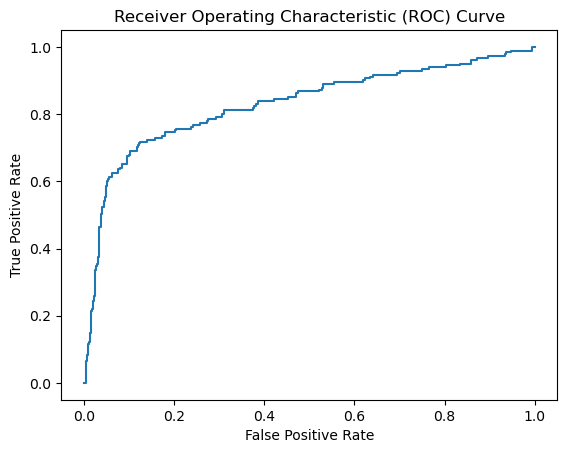

In [491]:
accuracy_cnn, precision_cnn, recall_cnn, conf_matrix_cnn, auroc_cnn = evaluate_performance(test_dataloader_1d)
print('Test Performance:') 
print(f'Accuracy: {accuracy_cnn:.2%}')
print(f'AUROC: {auroc_cnn:.2f}')
print(f'Precision: {precision_cnn:.2f}')
print(f'Recall: {recall_cnn:.2f}')
print('Confusion Matrix:')
print(conf_matrix_cnn)


In [509]:
#accuracy_dict = {'TrendFeatures': accuracy_feng, 'CNN': accuracy_cnn}
precision_dict = {'TrendFeatures': precision_feng, 'CNN': precision_cnn}
recall_dict = {'TrendFeatures': recall_feng, 'CNN': recall_cnn}
f1_dict = {'TrendFeatures': f1_feng, 'CNN': f1_cnn}
auc_dict = {'TrendFeatures': auc_feng, 'CNN': auroc_cnn}

In [511]:
results = pd.DataFrame([precision_dict, recall_dict, f1_dict, auc_dict], index=['Precision', 'Recall', 'F1', 'AUC'])

In [512]:
results.pivot_table(columns=['Precision', 'Recall', 'F1', 'AUC'])

,AUC,F1,Precision,Recall
CNN,0.829220,0.632997,0.810345,0.519337
TrendFeatures,0.867152,0.810496,0.842424,0.780899


In [492]:
total_correct = 0
total_samples = 0
predicted_labels = []
true_labels = []
all_probabilities = []
with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in test_dataloader_1d:
            outputs = cnn(inputs)
            probabilities = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities
            predicted = (probabilities > 0.5).int()
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            predicted_labels.extend(predicted.numpy())
            true_labels.extend(labels.numpy())
            all_probabilities.extend(probabilities.numpy())

In [508]:
f1_cnn = f1_score(true_labels, predicted_labels)

c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

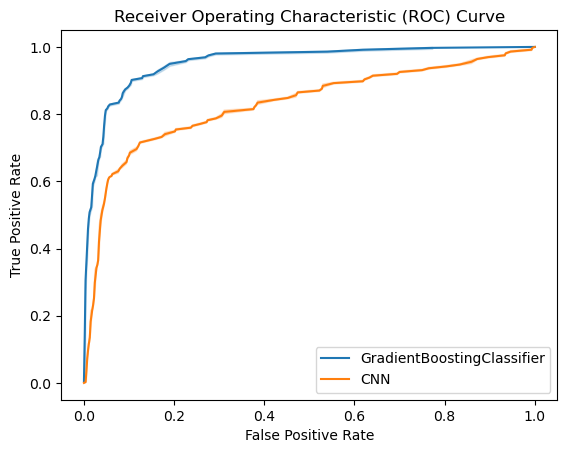

In [506]:
import seaborn as sns
from sklearn.metrics import roc_curve

# Calculate the FPR and TPR for the GradientBoostingClassifier model
fpr_gb, tpr_gb, _ = roc_curve(y_test, probs_feng[:,1])

# Calculate the FPR and TPR for the CNN model
fpr_cnn, tpr_cnn, _ = roc_curve(true_labels, all_probabilities)

# Plot the ROC curves
sns.lineplot(x=fpr_gb, y=tpr_gb, label='GradientBoostingClassifier')
sns.lineplot(x=fpr_cnn, y=tpr_cnn, label='CNN')

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [519]:
fis = pd.DataFrame.from_dict({'feature':X_train.columns, 'importances': gradboost.best_estimator_.feature_importances_})

c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='feature', ylabel='importances'>

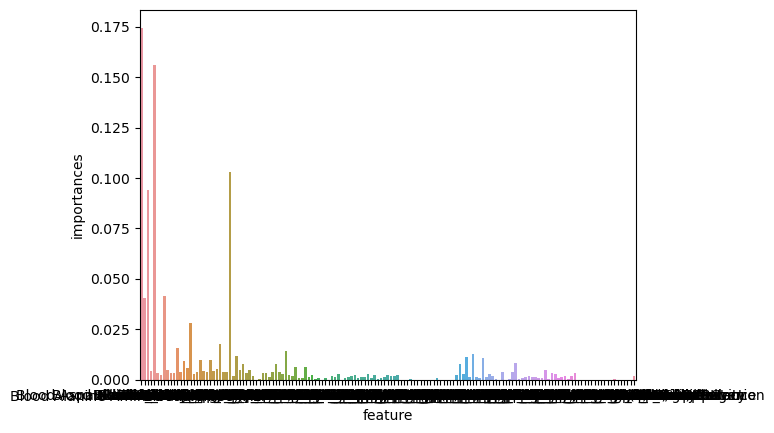

In [538]:
sns.barplot(fis, x='feature', y='importances')

In [539]:
ranks = fis.sort_values(by='importances', ascending=False)
ranks['rank'] = range(1, len(ranks)+1)

In [544]:
trend_features = ranks[ranks['feature'].str.contains('trend')]
print(trend_features.sort_values(by='rank', ascending=True))


                                               feature  importances  rank
44                          distal_trend_Blood Albumin     0.014089    10
101  proximal_trend_Blood Asparate Aminotransferase...     0.012504    11
99           proximal_trend_Blood Alkaline Phosphatase     0.011170    13
104              proximal_trend_Blood Bilirubin, Total     0.010557    14
114                       proximal_trend_Blood INR(PT)     0.008094    18
..                                                 ...          ...   ...
85       distal_trend_Urine Length of Urine Collection     0.000000   147
84                           distal_trend_Urine Ketone     0.000000   148
83                          distal_trend_Urine Glucose     0.000000   149
81                            distal_trend_Urine Blood     0.000000   150
111       proximal_trend_Blood Green Top Hold (plasma)     0.000000   151

[108 rows x 3 columns]


In [524]:
gradboost.best_params_

{'max_depth': 15,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 4,
 'n_estimators': 200}

In [530]:
current_df.head()

label,subject_id,Blood Alanine Aminotransferase (ALT),Blood Albumin,Blood Alkaline Phosphatase,Blood Anion Gap,Blood Asparate Aminotransferase (AST),Blood Basophils,Blood Bicarbonate,"Blood Bilirubin, Total","Blood Calcium, Total",...,Blood Estimated GFR (MDRD equation),Blood Green Top Hold (plasma),Urine Bilirubin,Urine Blood,Urine Leukocytes,Urine Nitrite,Urine Urine Appearance,Urine Urine Color,Urine Yeast,outcome
0,10000980,23.827739,4.985872,84.666492,17.0,14.423845,0.2,21.5,0.529795,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,10006029,24.000000,3.900000,173.000000,14.0,31.000000,0.2,19.0,0.400000,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,10010471,70.000000,3.400000,75.000000,23.5,235.500000,0.2,25.0,0.450000,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,10014471,22.000000,4.631230,98.000000,12.5,24.000000,1.0,27.0,0.800000,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
12,10017764,6.256094,4.155574,60.424498,15.0,39.815967,0.6,24.0,0.830891,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [534]:
new_X = current_df.drop(columns=['subject_id','outcome'])
new_X.fillna(0, inplace=True)
y = current_df['outcome']
#split as before
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42, stratify=y)
#scale as before
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)


In [535]:
new_grad = gradboost.best_estimator_.fit(X_train_scaled, y_train)
new_preds = new_grad.predict(X_test_scaled)

In [536]:
predictions_feng_new = new_grad.predict(X_test_scaled)
probs_feng_new= new_grad.predict_proba(X_test_scaled)
#calculate accuracy of the model
accuracy_feng_new = sum(predictions_feng_new==y_test)/len(predictions_feng_new)
#calculate AUC of the model
auc_feng_new = roc_auc_score(y_test, predictions_feng_new)
#calculate precision of the model
precision_feng_new = precision_score(y_test, predictions_feng_new)
#calculate recall of the model
recall_feng_new = recall_score(y_test, predictions_feng_new)
#calculate f1 score of the model
f1_feng_new = f1_score(y_test, predictions_feng_new)
#calculate confusion matrix of the model
conf_feng_new = confusion_matrix(y_test, predictions_feng_new)

In [529]:
print('Test Performance:')     
print(f'Accuracy: {accuracy_feng_new:.2%}')
print(f'AUROC: {auc_feng_new:.2f}')
print(f'Precision: {precision_feng_new:.2f}')
print(f'Recall: {recall_feng_new:.2f}')
print('Confusion Matrix:')
print(conf_feng)


Test Performance:
Accuracy: 90.49%
AUROC: 0.85
Precision: 0.84
Recall: 0.75
Confusion Matrix:
[[533  25]
 [ 45 133]]


In [546]:
25*7

175

In [549]:
current_df

label,subject_id,Blood Alanine Aminotransferase (ALT),Blood Albumin,Blood Alkaline Phosphatase,Blood Anion Gap,Blood Asparate Aminotransferase (AST),Blood Basophils,Blood Bicarbonate,"Blood Bilirubin, Total","Blood Calcium, Total",...,Blood Estimated GFR (MDRD equation),Blood Green Top Hold (plasma),Urine Bilirubin,Urine Blood,Urine Leukocytes,Urine Nitrite,Urine Urine Appearance,Urine Urine Color,Urine Yeast,outcome
0,10000980,23.827739,4.985872,84.666492,17.0,14.423845,0.200000,21.5,0.529795,9.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,10006029,24.000000,3.900000,173.000000,14.0,31.000000,0.200000,19.0,0.400000,9.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,10010471,70.000000,3.400000,75.000000,23.5,235.500000,0.200000,25.0,0.450000,8.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,10014471,22.000000,4.631230,98.000000,12.5,24.000000,1.000000,27.0,0.800000,9.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
12,10017764,6.256094,4.155574,60.424498,15.0,39.815967,0.600000,24.0,0.830891,9.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7455,19987216,195.500000,3.600000,131.500000,17.0,374.000000,1.550000,24.5,0.900000,9.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7457,19993603,33.406130,4.037856,91.193172,19.0,13.436771,0.200000,25.0,1.103851,9.226739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7458,19994588,21.525682,4.504621,98.834733,12.5,29.952877,0.485802,26.5,0.589622,8.050000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7459,19995320,20.025847,4.386224,76.925323,14.0,13.647882,0.200000,24.0,0.700571,9.456469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [10]:
from sklearn.model_selection import KFold

In [11]:
best_params = {'max_depth': 15,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 4,
 'n_estimators': 200}
model = GradientBoostingClassifier(**best_params)

# Cross-sectional Predictions by Time

In [ ]:
#window parameters
window_size = 3
window_ends = range(7, 365, window_size)

In [31]:
aucs = []
precisions = []
recalls = []
counter = 0
for i in window_ends:
    counter +=1
    print('Window (',i+window_size,', ', -i,')', '    iteration: ', counter, ' of ', window_ends)
    current_df = fg.current_bloods_df(processed_labs, i, -i+7)
    current_df.fillna(0, inplace=True)
    X = current_df.drop(columns=['subject_id','outcome'])
    y = current_df['outcome']
    window_aucs = []
    window_precisions = []
    window_recalls = []
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for j, (train_data, test_data) in enumerate(kf.split(X, y)):

        #split as before
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        X_train = X.iloc[train_data]
        X_test = X.iloc[test_data]
        y_train = y.iloc[train_data]
        y_test = y.iloc[test_data]
        
        #scale as before
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        #fit as before
        model.fit(X_train_scaled, y_train)
        #predict as before
        predictions = model.predict(X_test_scaled)
        probabilities = model.predict_proba(X_test_scaled)
        #calculate AUC of the model
        auc = roc_auc_score(y_test, probabilities[:,1])
        #calculate precision of the model
        precision = precision_score(y_test, predictions)
        #calculate recall of the model
        recall = recall_score(y_test, predictions)
        window_aucs.append(auc)
        window_precisions.append(precision)
        window_recalls.append(recall)

    aucs.append(sum(window_aucs)/len(window_aucs))
    precisions.append(sum(window_precisions)/len(window_precisions))
    recalls.append(sum(window_recalls)/len(window_recalls))



Window ( 10 ,  -7 )     iteration:  1  of 25


Window ( 13 ,  -10 )     iteration:  2  of 25
Window ( 16 ,  -13 )     iteration:  3  of 25
Window ( 19 ,  -16 )     iteration:  4  of 25
Window ( 22 ,  -19 )     iteration:  5  of 25
Window ( 25 ,  -22 )     iteration:  6  of 25
Window ( 28 ,  -25 )     iteration:  7  of 25
Window ( 31 ,  -28 )     iteration:  8  of 25
Window ( 34 ,  -31 )     iteration:  9  of 25
Window ( 37 ,  -34 )     iteration:  10  of 25
Window ( 40 ,  -37 )     iteration:  11  of 25
Window ( 43 ,  -40 )     iteration:  12  of 25
Window ( 46 ,  -43 )     iteration:  13  of 25
Window ( 49 ,  -46 )     iteration:  14  of 25
Window ( 52 ,  -49 )     iteration:  15  of 25
Window ( 55 ,  -52 )     iteration:  16  of 25
Window ( 58 ,  -55 )     iteration:  17  of 25
Window ( 61 ,  -58 )     iteration:  18  of 25
Window ( 64 ,  -61 )     iteration:  19  of 25
Window ( 67 ,  -64 )     iteration:  20  of 25
Window ( 70 ,  -67 )     iteration:  21  of 25
Window ( 73 ,  -70 )     iteration:  22  of 25
Window ( 76 ,  -73 ) 

# Cross-sectional predictions with just test indicators

In [30]:
aucs_testind = []
precisions_testind = []
recalls_testind = []
counter = 0
for i in window_ends:
    counter +=1
    print('Window (',i+window_size,', ', -i,')', '    iteration: ', counter, ' of ', len(window_ends))
    current_df = fg.current_bloods_df(processed_labs, i, -i+7)
    current_df.fillna(0, inplace=True)
    X = current_df.drop(columns=['subject_id','outcome'])
    X[X>0] = 1
    y = current_df['outcome']
    window_aucs = []
    window_precisions = []
    window_recalls = []
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for j, (train_data, test_data) in enumerate(kf.split(X, y)):

        #split as before
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        X_train = X.iloc[train_data]
        X_test = X.iloc[test_data]
        y_train = y.iloc[train_data]
        y_test = y.iloc[test_data]
        
        #scale as before
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        #fit as before
        model.fit(X_train_scaled, y_train)
        #predict as before
        predictions = model.predict(X_test_scaled)
        probabilities = model.predict_proba(X_test_scaled)
        #calculate AUC of the model
        auc = roc_auc_score(y_test, probabilities[:,1])
        #calculate precision of the model
        precision = precision_score(y_test, predictions)
        #calculate recall of the model
        recall = recall_score(y_test, predictions)
        window_aucs.append(auc)
        window_precisions.append(precision)
        window_recalls.append(recall)

    aucs_testind.append(sum(window_aucs)/len(window_aucs))
    precisions_testind.append(sum(window_precisions)/len(window_precisions))
    recalls_testind.append(sum(window_recalls)/len(window_recalls))



Window ( 10 ,  -7 )     iteration:  1  of 25


Window ( 13 ,  -10 )     iteration:  2  of 25
Window ( 16 ,  -13 )     iteration:  3  of 25
Window ( 19 ,  -16 )     iteration:  4  of 25
Window ( 22 ,  -19 )     iteration:  5  of 25
Window ( 25 ,  -22 )     iteration:  6  of 25
Window ( 28 ,  -25 )     iteration:  7  of 25
Window ( 31 ,  -28 )     iteration:  8  of 25
Window ( 34 ,  -31 )     iteration:  9  of 25
Window ( 37 ,  -34 )     iteration:  10  of 25
Window ( 40 ,  -37 )     iteration:  11  of 25
Window ( 43 ,  -40 )     iteration:  12  of 25
Window ( 46 ,  -43 )     iteration:  13  of 25
Window ( 49 ,  -46 )     iteration:  14  of 25
Window ( 52 ,  -49 )     iteration:  15  of 25
Window ( 55 ,  -52 )     iteration:  16  of 25
Window ( 58 ,  -55 )     iteration:  17  of 25
Window ( 61 ,  -58 )     iteration:  18  of 25
Window ( 64 ,  -61 )     iteration:  19  of 25
Window ( 67 ,  -64 )     iteration:  20  of 25
Window ( 70 ,  -67 )     iteration:  21  of 25
Window ( 73 ,  -70 )     iteration:  22  of 25
Window ( 76 ,  -73 ) 

c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Window ( 229 ,  -226 )     iteration:  74  of 25
Window ( 232 ,  -229 )     iteration:  75  of 25
Window ( 235 ,  -232 )     iteration:  76  of 25
Window ( 238 ,  -235 )     iteration:  77  of 25
Window ( 241 ,  -238 )     iteration:  78  of 25
Window ( 244 ,  -241 )     iteration:  79  of 25
Window ( 247 ,  -244 )     iteration:  80  of 25
Window ( 250 ,  -247 )     iteration:  81  of 25
Window ( 253 ,  -250 )     iteration:  82  of 25
Window ( 256 ,  -253 )     iteration:  83  of 25
Window ( 259 ,  -256 )     iteration:  84  of 25
Window ( 262 ,  -259 )     iteration:  85  of 25
Window ( 265 ,  -262 )     iteration:  86  of 25
Window ( 268 ,  -265 )     iteration:  87  of 25
Window ( 271 ,  -268 )     iteration:  88  of 25
Window ( 274 ,  -271 )     iteration:  89  of 25
Window ( 277 ,  -274 )     iteration:  90  of 25
Window ( 280 ,  -277 )     iteration:  91  of 25
Window ( 283 ,  -280 )     iteration:  92  of 25
Window ( 286 ,  -283 )     iteration:  93  of 25
Window ( 289 ,  -286

c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Window ( 355 ,  -352 )     iteration:  116  of 25
Window ( 358 ,  -355 )     iteration:  117  of 25
Window ( 361 ,  -358 )     iteration:  118  of 25


c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Window ( 364 ,  -361 )     iteration:  119  of 25
Window ( 367 ,  -364 )     iteration:  120  of 25


c:\Users\victo\anaconda3\envs\LIVER_PRED\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


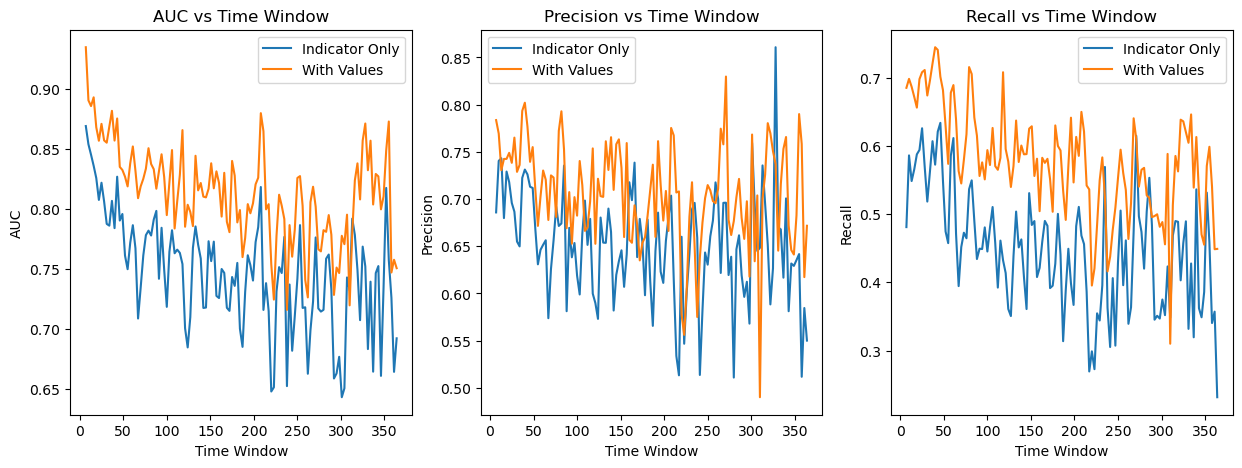

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
#Plot the AUCS against the time windows
ax1.plot(window_ends, aucs_testind, label='Indicator Only')
ax1.plot(window_ends, aucs, label='With Values')
ax1.set_xlabel('Time Window')
ax1.set_ylabel('AUC')
ax1.set_title('AUC vs Time Window')
ax1.legend()

#Plot the precisions against the time windows
ax2.plot(window_ends, precisions_testind, label='Indicator Only')
ax2.plot(window_ends, precisions, label='With Values')
ax2.set_xlabel('Time Window')
ax2.set_ylabel('Precision')
ax2.set_title('Precision vs Time Window')
ax2.legend()

#Plot the recalls against the time windows
ax3.plot(window_ends, recalls_testind, label='Indicator Only')
ax3.plot(window_ends, recalls, label='With Values')
ax3.set_xlabel('Time Window')
ax3.set_ylabel('Recall')
ax3.set_title('Recall vs Time Window')
ax3.legend()